In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing 
prices=pd.read_csv("C:\\MLCourse\\house.csv")

In [82]:
X = prices[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y = prices['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=101)

# normalize or feature scaling

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))

X_train1 = min_max_scaler.fit_transform(X_train)
X_test1=min_max_scaler.fit_transform(X_test)

In [83]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression(normalize=True)

lm.fit(X_train1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [84]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-1.241471e+06
bathrooms,3.029974e+05
sqft_living,1.191177e+06
sqft_lot,3.196612e+05
floors,3.106287e+04
waterfront,7.143747e+05
condition,1.151859e+05
grade,1.215824e+06
sqft_above,8.055748e+05
sqft_basement,3.722063e+05


Text(0, 0.5, 'Predicted Y')

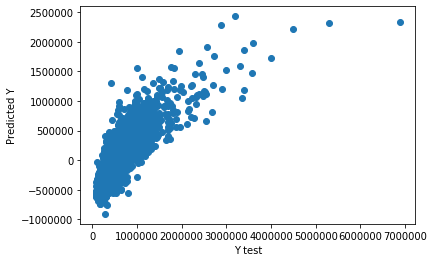

In [85]:
predictions=lm.predict(X_test1)
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [86]:
lm.score(X_train1,y_train)

0.6887938319137872

In [76]:
# correlation 

p=prices.corr()
p.style.background_gradient()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1,-0.0167622,0.00128628,0.00516023,-0.0122578,-0.132109,0.0185252,-0.00272109,0.0115924,-0.0237826,0.00813045,-0.0108421,-0.00515113,0.0213801,-0.016907,-0.00822432,-0.00189093,0.0207986,-0.002901,-0.138798
price,-0.0167622,1,0.30835,0.525138,0.702035,0.0896609,0.256794,0.266369,0.397293,0.0363618,0.667434,0.605567,0.323816,0.0540115,0.126434,-0.0532029,0.307003,0.0216262,0.585379,0.0824472
bedrooms,0.00128628,0.30835,1,0.515884,0.576671,0.0317032,0.175429,-0.00658248,0.0795319,0.0284721,0.356967,0.4776,0.303093,0.154178,0.0188408,-0.152668,-0.00893101,0.129473,0.391638,0.0292442
bathrooms,0.00516023,0.525138,0.515884,1,0.754665,0.0877397,0.500653,0.0637436,0.187737,-0.124982,0.664983,0.685342,0.28377,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.0871754
sqft_living,-0.0122578,0.702035,0.576671,0.754665,1,0.172826,0.353949,0.103818,0.284611,-0.0587526,0.762704,0.876597,0.435043,0.318049,0.0553629,-0.19943,0.0525295,0.240223,0.75642,0.183286
sqft_lot,-0.132109,0.0896609,0.0317032,0.0877397,0.172826,1,-0.00520099,0.0216037,0.0747101,-0.00895825,0.113621,0.183512,0.0152862,0.0530804,0.00764351,-0.129574,-0.0856828,0.229521,0.144608,0.718557
floors,0.0185252,0.256794,0.175429,0.500653,0.353949,-0.00520099,1,0.0236983,0.0294438,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.0063384,-0.0591206,0.0496141,0.125419,0.279885,-0.0112692
waterfront,-0.00272109,0.266369,-0.00658248,0.0637436,0.103818,0.0216037,0.0236983,1,0.401857,0.0166532,0.0827749,0.0720746,0.0805879,-0.0261611,0.0928848,0.0302847,-0.0142738,-0.0419102,0.0864631,0.0307033
view,0.0115924,0.397293,0.0795319,0.187737,0.284611,0.0747101,0.0294438,0.401857,1,0.0459897,0.251321,0.167649,0.276947,-0.0534399,0.103917,0.0848269,0.00615673,-0.0783997,0.280439,0.0725746
condition,-0.0237826,0.0363618,0.0284721,-0.124982,-0.0587526,-0.00895825,-0.263768,0.0166532,0.0459897,1,-0.144674,-0.158214,0.174105,-0.361417,-0.0606178,0.00302552,-0.014941,-0.1065,-0.0928243,-0.00340552


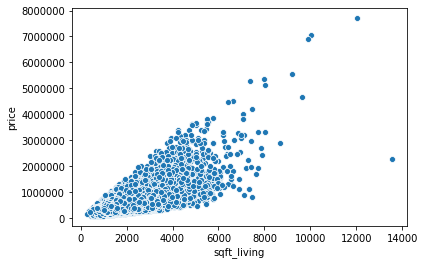

In [100]:
sns.scatterplot(x="sqft_living",y="price",data=prices)

In [108]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

X_train = np.array(prices['sqft_living'], dtype=pd.Series).reshape(-1,1)

y_train = np.array(prices['price'], dtype=pd.Series)

lr.fit(X_train,y_train)

X_test = np.array(prices['sqft_living'], dtype=pd.Series).reshape(-1,1)
y_test = np.array(prices['price'], dtype=pd.Series)

pred = lr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

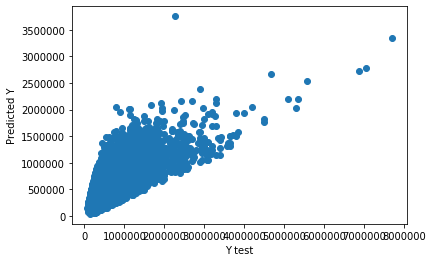

In [110]:
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [111]:
lr.score(X_train,y_train)

0.49285321790379316

In [97]:

# polynomial regression

x = np.array(prices['sqft_living'])
y = np.array(prices['price'])

p4 =np.poly1d(np.polyfit(x, y, 5))
print(p4)

            5             4             3          2
-2.789e-13 x + 7.031e-09 x - 6.194e-05 x + 0.2831 x - 360.3 x + 4.581e+05


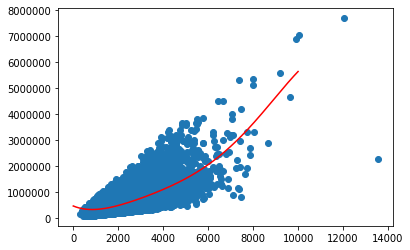

In [94]:
xp = np.linspace(0, 10000, 10000)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [98]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.5451626985984446


In [138]:
# polynomial regression

# method 1 (diving into test data and train only) (less features)


from sklearn.preprocessing import PolynomialFeatures

train_data,test_data = train_test_split(prices,train_size = 0.8,random_state=3)

features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
             'grade','yr_built','zipcode']

polyfeat = PolynomialFeatures(degree=2)

X_allpoly = polyfeat.fit_transform(prices[features])

X_trainpoly = polyfeat.fit_transform(train_data[features])

X_testpoly = polyfeat.fit_transform(test_data[features])

poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred1 = poly.predict(X_testpoly)

Text(0, 0.5, 'Predicted Y')

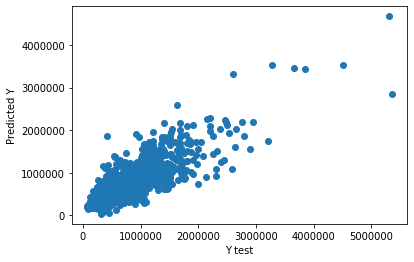

In [141]:
plt.scatter(test_data['price'],pred1)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [142]:
from sklearn.metrics import r2_score

r2 = r2_score(test_data['price'], pred1)

print(r2)

0.7157433850438334


In [154]:


# method 2 (dividing into x train, x test,y train,y test) (all features)


from sklearn.preprocessing import PolynomialFeatures


polyfeat = PolynomialFeatures(degree=2)

X_allpoly = polyfeat.fit_transform(X)

X_trainpoly = polyfeat.fit_transform(X_train)

X_testpoly = polyfeat.fit_transform(X_test)

poly = linear_model.LinearRegression().fit(X_trainpoly, y_train)

pred1 = poly.predict(X_testpoly)

Text(0, 0.5, 'Predicted Y')

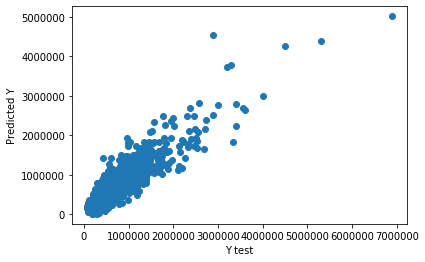

In [155]:
plt.scatter(y_test,pred1)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [156]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, pred1)

print(r2)

0.8278536464169585
